In [375]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, make_scorer
import seaborn as sns

import os
from scipy.stats import skew, probplot, norm
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

OSError: dlopen(/Users/Muyan/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/Muyan/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [53]:
train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/train.csv')
test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/test.csv')

In [54]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [55]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [57]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize']= [8.0, 4.0]

In [58]:
# categorical features
categorical_feat1 = train.columns[train.dtypes=='object'].tolist()

# numerical features
numeric_feat1 = train.columns[(train.dtypes=='int64')|(train.dtypes=='float64')].drop('SalePrice').tolist()

print('categorical features:\n{}\n{}'.format(sorted(categorical_feat1), len(categorical_feat1)))
print('\nnumerical features:\n{}\n{}'.format(sorted(numeric_feat1), len(numeric_feat1)))

categorical features:
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']
43

numerical features:
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'Overall

In [59]:
def check_missingness(df):
    missing_features = df.columns[df.isna().any()]

    # how bad is the missing ?
    missing = {}
    for i in missing_features:
        missing[i]= df[i].isna().sum()
    missing = pd.Series(missing).sort_values(ascending=False)
    return missing

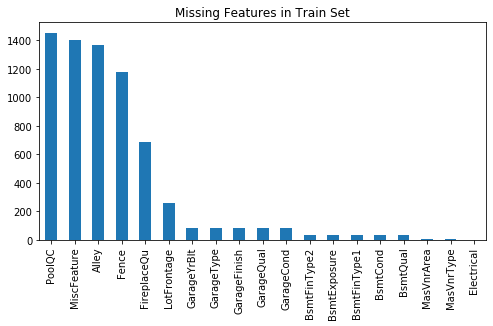

In [60]:
check_missingness(train)[:20].plot(kind='bar')
plt.title('Missing Features in Train Set')
plt.savefig('train_missing.png',bbox_inches='tight')

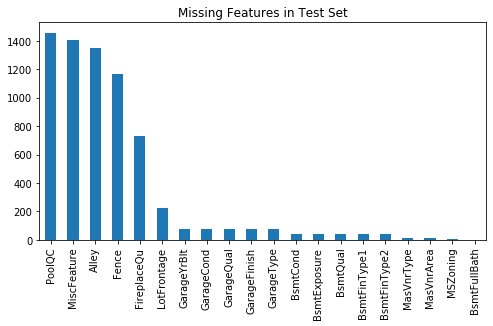

In [61]:
check_missingness(test)[:20].plot(kind='bar')
plt.title('Missing Features in Test Set')

plt.savefig('test_missing.png',bbox_inches='tight')

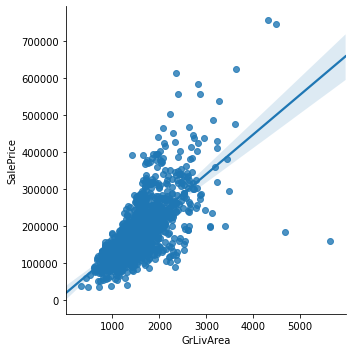

In [62]:
sns.lmplot(x='GrLivArea', y= 'SalePrice', data=train)
plt.savefig('saleprice_grlivarea.png',bbox_inches='tight')

(-0.5, 9.5, 0, 800000)

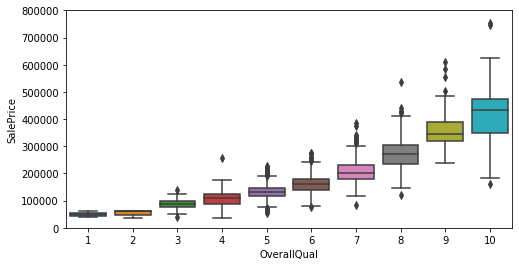

In [63]:
sns.boxplot(train.OverallQual, train.SalePrice)
plt.axis(ymin=0, ymax=800000)

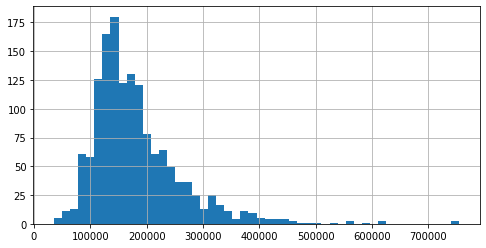

In [64]:
train.SalePrice.hist(bins=50)
plt.savefig('saleprice.png',bbox_inches='tight')

In [14]:
# Correlation

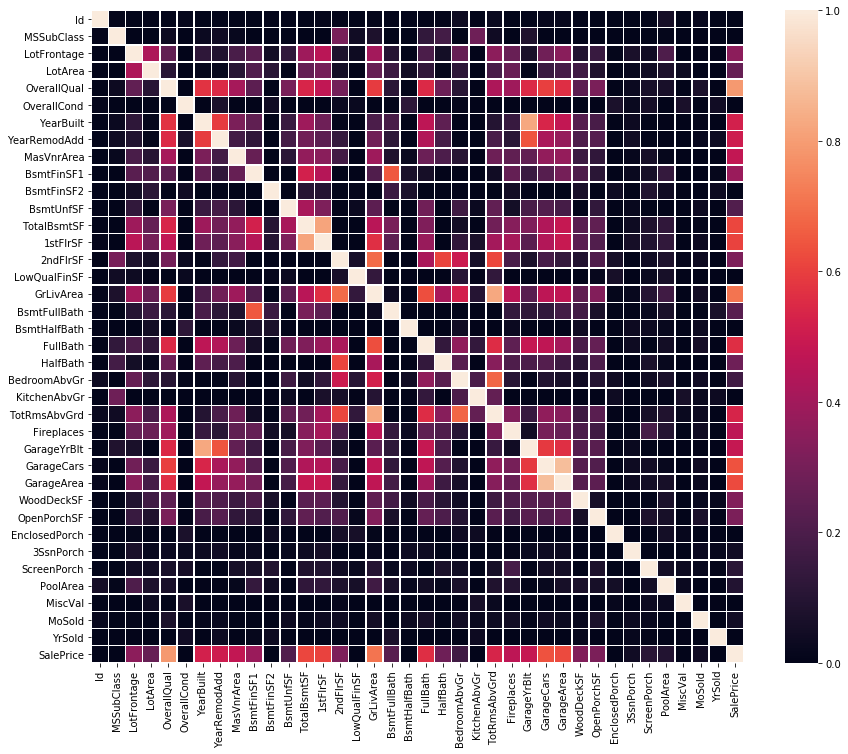

In [15]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat,linewidths=.5,vmin=0, vmax=1, square=True)

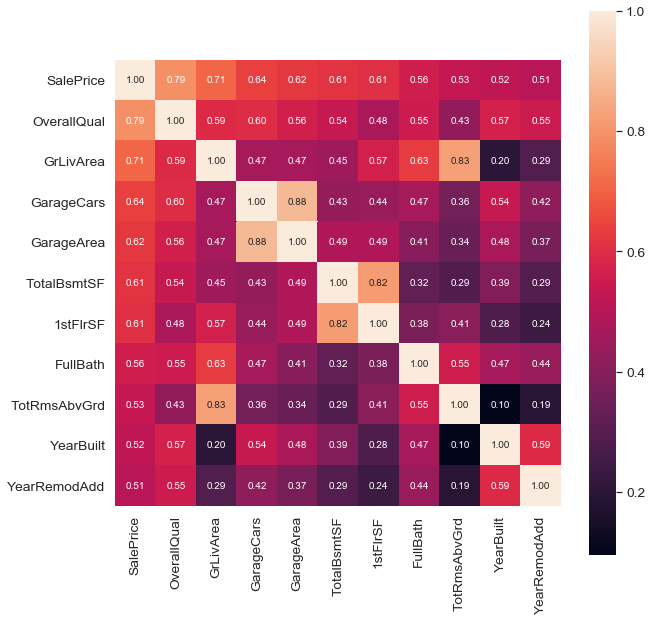

In [16]:
plt.figure(figsize=(10,10))
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [17]:
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train[cols], height = 2.5)
# plt.show()

# Data Processing

In [65]:
def process_missing(df):
   
    # fill LotFrontage missings with median value in the same neighborhood
    df['LotFrontage'] = df[['Neighborhood','LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.median()))

    # impute MSZoning missings as the most frequent value in the same MSSubClass
    df['MSZoning'] = df[['MSSubClass', 'MSZoning']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))

    df['Utilities'] =df['Utilities'].fillna(df['Utilities'].mode()[0])

    df['Exterior1st'] = df['Exterior1st'].fillna('Wd Sdng')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Wd Sdng')

    df['Electrical']=df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))

    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['KitchenQual'] = df.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    df[numeric_feat1] = df[numeric_feat1].fillna(0)
    df[categorical_feat1] = df[categorical_feat1].fillna('None')

    #print(df.head())
    return df

In [66]:
all_data = pd.concat([train.copy().drop(columns=['SalePrice']), test.copy()], axis=0)

In [67]:
all_data = process_missing(all_data)

In [68]:
all_data.isnull().any().sum()

0

In [69]:
# Feature Engineering

In [70]:
def Feat_engineering1(data):
    df = data.copy()
    # drop 'Id', 'Street', 'Utilities','PoolQC'
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC', 'PoolArea', 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath',\
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF','TotalBsmtSF', '1stFlrSF',\
                  '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd'])
    # convert PoolArea to binary
    df['HasPool'] = df['PoolArea'].apply(lambda x: 'Yes' if x>0 else 'No')

    # convert to categorical
    df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']] = df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']].astype(str)

    # combine features of 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath'
    df['TotalBath'] = df['HalfBath']/2 + df['BsmtHalfBath']/2 + df['FullBath'] + df['BsmtFullBath']
    df['TotalBath'] = df['TotalBath'].astype('str')

    # combine features of 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'WoodDeckSF'
    df['Total_PorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

    # combine features of TotalSF = TotalBsmtSF + X1stFlrSF + X2ndFlrSF
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine features of 'BsmtFinSF1', 'BsmtFinSF2', 'X1stFlrSF', 'X2ndFlrSF'
    df['TotalFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine 'YearBuilt', 'YearRemodAdd'
    df['YearBuildRemod'] = df['YearBuilt'] + df['YearRemodAdd']

    # add new features
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['Has2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    new_columns = list(set(df.columns).difference(to_remove))
    

    return df[new_columns]

In [71]:
def Feat_engineering(data):
    df = data.copy()
    
     # convert to categorical
    to_categorical = ['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 
                      'GarageCars', 'HalfBath','BsmtHalfBath',
                      'FullBath','BsmtFullBath','Fireplaces']
    
    df[to_categorical] = df[to_categorical].astype(str)

    # drop features
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC'])
    new_columns = list(set(df.columns).difference(to_remove))
    
    return df[new_columns]

In [72]:
all_data = Feat_engineering(all_data)

In [73]:
categorical_feat = all_data.columns[all_data.dtypes=='object']
numeric_feat = all_data.columns[all_data.dtypes!='object']

In [74]:
print(len(categorical_feat))
print(len(numeric_feat))

49
27


# Skew Transform

In [75]:
def skew_transform(data):
    df = data.copy()
    skew_features = df.apply(lambda x: skew(x)).sort_values(ascending=False)

    high_skew = skew_features[skew_features > 0.75]
    skew_index = high_skew.index
    print(skew_index)

    df[skew_index] = df[skew_index].apply(lambda x: boxcox1p(x, boxcox_normmax(x+1)))
    return df

In [76]:
all_data[numeric_feat] = skew_transform(all_data[numeric_feat])

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'MasVnrArea',
       'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1',
       'MSSubClass', 'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF'],
      dtype='object')


In [77]:
# Normalize Sale Price
salePrice = np.log(train.SalePrice)

In [78]:
plt.rcParams['figure.figsize']= [10.0, 4.0]

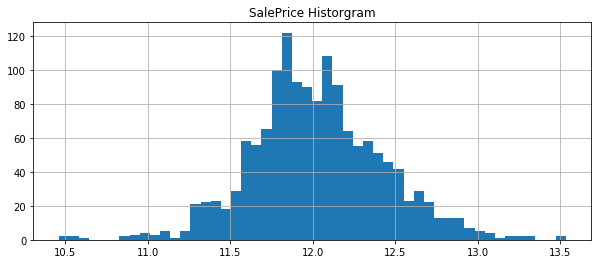

In [79]:
salePrice.hist(bins=50)
plt.title('SalePrice Historgram')
plt.savefig('saleprice_log.png',bbox_inches='tight')

In [80]:
numeric_feat

Index(['GarageYrBlt', 'MasVnrArea', 'PoolArea', 'OpenPorchSF', 'WoodDeckSF',
       'MoSold', 'OverallQual', 'OverallCond', 'LotArea', 'EnclosedPorch',
       'TotalBsmtSF', 'YearRemodAdd', 'MiscVal', 'LowQualFinSF', 'YearBuilt',
       'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea', 'LotFrontage',
       'MSSubClass', '3SsnPorch', '2ndFlrSF', 'ScreenPorch', '1stFlrSF',
       'BsmtUnfSF', 'YrSold'],
      dtype='object')

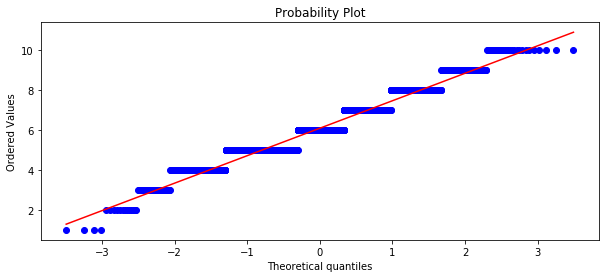

In [81]:
probplot(all_data['OverallQual'], plot=plt)
plt.savefig('overallqual transformed.png',bbox_inches='tight')

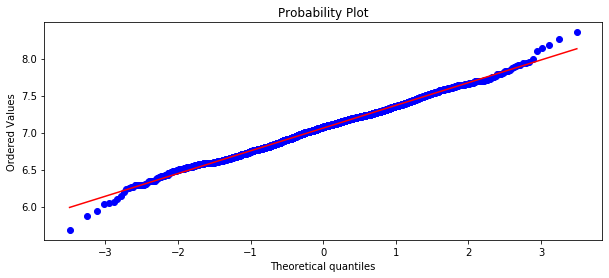

In [82]:
probplot(all_data['GrLivArea'], plot=plt)
plt.savefig('GrLivArea transform.png',bbox_inches='tight')

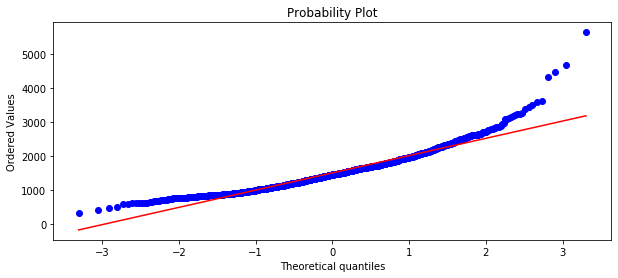

In [83]:
probplot(train['GrLivArea'], plot=plt)
plt.savefig('GrLivArea before.png',bbox_inches='tight')

In [84]:
# remove outliers

In [85]:
from scipy.stats import zscore
z_score = {}
for i in numeric_feat:
    z_score[i] = zscore(all_data[i])
z_score = pd.DataFrame(z_score)
z_score = z_score.head(train.shape[0])
for i in ['OverallQual','GrLivArea']:
    print(i,z_score[np.abs(z_score[i])>3.5][i].sort_values(ascending=False))

OverallQual 533   -3.610024
375   -3.610024
Name: OverallQual, dtype: float64
GrLivArea 1298    4.218663
523     3.646113
1182    3.512723
1100   -3.640328
533    -4.481538
Name: GrLivArea, dtype: float64


In [98]:
# choose the highest z_score from two ends as outlier
# two outliers case
outliers = [1298, 533] 

# four outliers case
outliers = [1298, 533, 523, 1100]

In [99]:
to_drop = list(map(lambda x: x[0]+'_'+x[1],[(i, all_data[i].mode()[0]) for i in categorical_feat]))

In [100]:
cat_dummy = pd.get_dummies(all_data[categorical_feat]).drop(columns=to_drop)

In [101]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_label = all_data.copy()
for i in categorical_feat:
    data_label[i] = le.fit_transform(data_label[i])

In [102]:
data_dummy = pd.concat([cat_dummy,all_data[numeric_feat]], axis=1)

In [103]:
X = data_dummy.head(train.shape[0])
X.drop(outliers, inplace=True)
y = salePrice.copy()
y.drop(outliers, inplace=True)

In [104]:
X_le=data_label.head(train.shape[0])
X_le.drop(outliers, inplace=True)

In [105]:
X.shape

(1456, 287)

In [106]:
X_le.shape

(1456, 76)

In [107]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]

In [108]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=108)
train_idx = X_train.index
test_idx = X_test.index

In [109]:
plt.rcParams['figure.figsize']= [6.0, 5.0]

In [110]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

# Modeling

In [182]:
X_train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/X_train.csv')
y_train = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/y_train.csv', index_col=0, names=['SalePrice'])
X_test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/X_test.csv')
y_test = pd.read_csv('/Users/Muyan/Desktop/ML_Project/Yan_ML_Data/y_test.csv', index_col=0, names=['SalePrice'])

## Lasso

In [112]:
lasso = linear_model.Lasso(normalize = True)

lasso = lasso.set_params(random_state=50)

# Train the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=50, selection='cyclic',
      tol=0.0001, warm_start=False)

In [113]:
# Initial prediction
lasso_pred = lasso.predict(X_test)

# Print out MAE, MSE, and RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))

print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0    6.178992e+303
SalePrice      5.487959e+04
dtype: float64
Mean Squared Error (MSE): 551.381864826745
Root Mean Square Error (RMSE): 23.481521774083234
Mean Absolute Percent Error (MAPE): Unnamed: 0    7.697149e+24
SalePrice     3.062000e+01
dtype: float64 %.


#  Grid search Lasso

In [114]:
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_lasso = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

In [115]:
grid_search_lasso = ms.GridSearchCV(lasso, param_grid_lasso, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time grid_search_lasso.fit(X_train, y_train)

CPU times: user 16.2 s, sys: 1.37 s, total: 17.6 s
Wall time: 1min 29s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=50,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.007...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [116]:
# get the best parameters
grid_search_lasso.best_params_

{'alpha': 0.00014302977675878753, 'max_iter': 20}

In [117]:
# Prediction using the tuned parameters
grid_lasso = grid_search_lasso.best_estimator_

In [118]:
print("The train set R^2 is: %.5f" % grid_lasso.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_lasso.score(X_test, y_test))

The train set R^2 is: 1.00000
The test set R^2 is is: 1.00000


In [ ]:
#Prediction with tuned hyperparameters
grid_lasso_pred = grid_lasso.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(grid_lasso_pred) - np.expm1(y_train))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, grid_lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, grid_lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [126]:
#Prediction with tuned hyperparameters
grid_lasso_pred = grid_lasso.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_lasso_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0    5.641238e+299
SalePrice      1.272293e+04
dtype: float64
Mean Squared Error (MSE): 0.00614133474840683
Root Mean Square Error (RMSE): 0.07836666860602683
Mean Absolute Percent Error (MAPE): Unnamed: 0    0.37
SalePrice     7.59
dtype: float64 %.


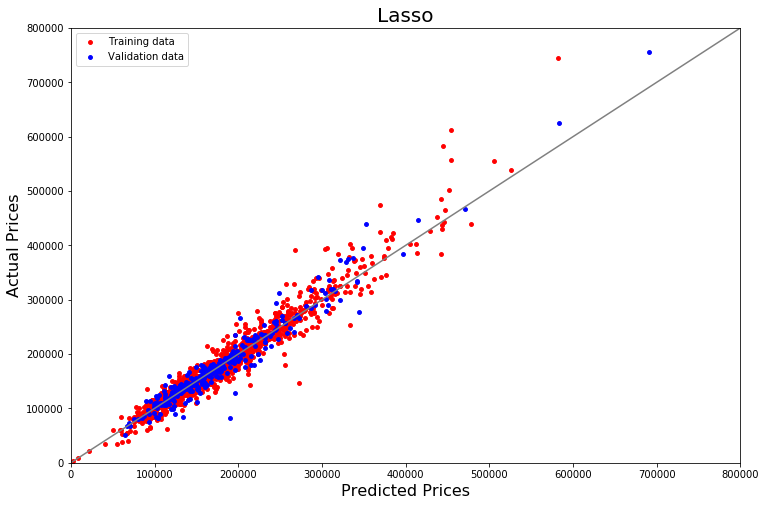

In [127]:
y_train_lasso = grid_lasso.predict(X_train)
y_test_lasso = grid_lasso.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_lasso), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_lasso), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Lasso", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## Ridge

In [128]:
X_train, X_test = X.loc[train_idx], X.loc[test_idx]

In [162]:
ridge = Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)
ridge.fit(X_train, y_train)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)

train error  0.05498204942487639
test error 0.07644728142776924


[0.05498204942487639, 0.07644728142776924]

In [130]:
grid_para = dict(alpha = np.linspace(0,20,10))
ridge.set_params(random_state=108, tol=0.001)
grid_search_ridge = ms.GridSearchCV(ridge,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=0)
%time grid_search_ridge.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
ridge=grid_search_ridge.best_estimator_
print(ridge)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)

CPU times: user 363 ms, sys: 126 ms, total: 489 ms
Wall time: 3.72 s
Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)
train error  0.4591353054308678
test error 0.5929778971914366


[0.4591353054308678, 0.5929778971914366]

In [131]:
#Prediction with tuned hyperparameters
grid_ridge_pred = grid_search_ridge.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0         inf
SalePrice     12353.33
dtype: float64
Mean Squared Error (MSE): 91392.9793769674
Root Mean Square Error (RMSE): 302.3127178551498
Mean Absolute Percent Error (MAPE): Unnamed: 0     inf
SalePrice     7.39
dtype: float64 %.


## RandomSearch Ridge

In [132]:
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_ridge = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

In [133]:
grid_search_ridge = ms.GridSearchCV(lasso, param_grid_ridge, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time grid_search_ridge.fit(X_train, y_train)

CPU times: user 13.8 s, sys: 1.69 s, total: 15.5 s
Wall time: 1min 24s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=50,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.007...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [220]:
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=108, solver='auto', tol=0.001)

param_grid_ridge = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

random_search_ridge = RandomizedSearchCV(ridge, param_grid_ridge, n_iter=150, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)
random_search_ridge.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=7, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=108, solver='auto', tol=0.001),
                   iid='warn', n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': array([5.00000000e+19, 4.73092410e+19, 4.47632856e+19, 4.23543413e+19,
       4.00750348e+19, 3.79183896e+19, 3.58...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                                        'max_iter': [5, 10, 20]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squ

In [221]:
random_search_ridge.best_params_

{'max_iter': 20, 'alpha': 7.313666781005679}

In [222]:
# get the best parameters
grid_search_ridge.best_params_

{'alpha': 5e+19, 'max_iter': 5}

In [223]:
grid_ridge = grid_search_ridge.best_estimator_

In [224]:
print("The train set R^2 is: %.5f" % random_search_ridge.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_search_ridge.score(X_test, y_test))

The train set R^2 is: -0.00880
The test set R^2 is is: -0.01155


In [ ]:
#Prediction with tuned hyperparameters
random_ridge_pred = random_search_ridge.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_train))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [170]:
#Prediction with tuned hyperparameters
random_ridge_pred = random_search_ridge.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_ridge_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_ridge_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ SalePrice    12312.66
dtype: float64
Mean Squared Error (MSE): 0.011644853018080728
Root Mean Square Error (RMSE): 0.10791132015725101
Mean Absolute Percent Error (MAPE): SalePrice    7.49
dtype: float64 %.


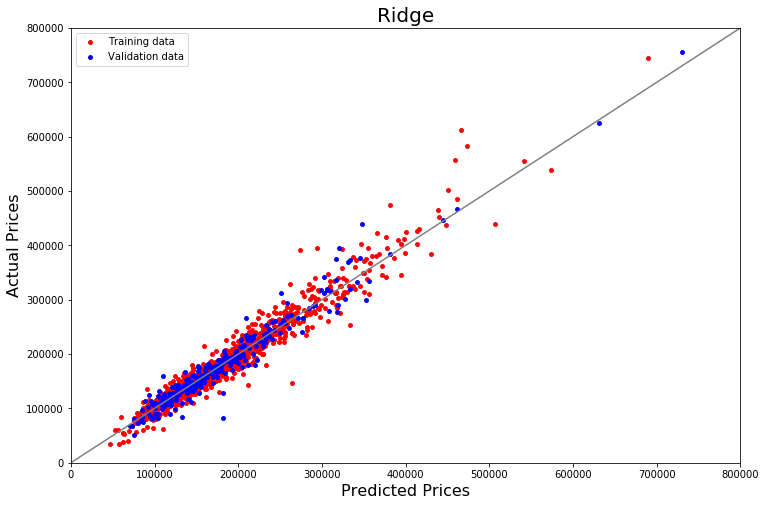

In [226]:
y_train_ridge = random_search_ridge.predict(X_train)
y_test_ridge = random_search_ridge.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_ridge), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_ridge), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Ridge", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## ElasticNet

In [180]:
eNet = linear_model.ElasticNet(normalize = True)

eNet.set_params(random_state=12)

# Train the model on training data
eNet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=12, selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
# Initial prediction
eNet_pred = eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(eNet_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

# Random Search ElasticNet

In [194]:
combos = 1
for key in param_grid_eNet:
    combos *= len(param_grid_eNet[key])
    
combos

30000

In [190]:
param_grid_eNet = {"max_iter": [5, 10, 20],
                    "alpha": 100**np.linspace(10,-2,1000)*0.5,
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [205]:
eNet = linear_model.ElasticNet(normalize = True)

random_search_eNet = ms.RandomizedSearchCV(eNet, param_grid_eNet, n_iter=100, scoring= 'neg_mean_squared_error', 
                                    n_jobs=-1, return_train_score = True)

%time random_search_eNet.fit(X_train, y_train)

CPU times: user 725 ms, sys: 115 ms, total: 840 ms
Wall time: 5.27 s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=True,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([5.00000000e+19, 4.73...
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max

In [211]:
# get the best parameters
random_search_eNet.best_params_

{'max_iter': 10, 'l1_ratio': 0.2, 'alpha': 0.0006026304684354207}

In [212]:
# Prediction using the tuned parameters
random_eNet = random_search_eNet.best_estimator_

In [213]:
print("The train set R^2 is: %.5f" % random_eNet.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_eNet.score(X_test, y_test))

The train set R^2 is: 0.92564
The test set R^2 is is: 0.90787


In [290]:
#Prediction with tuned hyperparameters
random_eNet_pred = random_eNet.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_eNet_pred) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13907.3
Mean Squared Error (MSE): 0.01184751055298415
Root Mean Square Error (RMSE): 0.10884627027594537
Mean Absolute Percent Error (MAPE): 7.83 %.


In [ ]:
#Prediction with tuned hyperparameters
random_eNet_pred = random_eNet.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_train))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [228]:
#Prediction with tuned hyperparameters
random_eNet_pred = random_eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_ridge_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ SalePrice    12312.66
dtype: float64
Mean Squared Error (MSE): 0.013943737718793809
Root Mean Square Error (RMSE): 0.11808360478404192
Mean Absolute Percent Error (MAPE): SalePrice    7.49
dtype: float64 %.


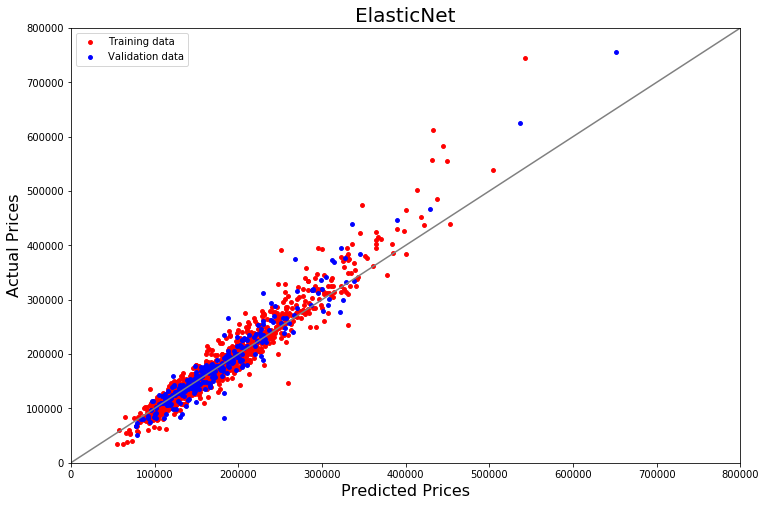

In [229]:
y_train_eNet = random_eNet.predict(X_train)
y_test_eNet = random_eNet.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_eNet), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_eNet), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("ElasticNet", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## Random Forest

In [230]:
rforest = RandomForestRegressor()

rforest.set_params(random_state=52)

# Train the model on training data
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=52, verbose=0,
                      warm_start=False)

In [231]:
print("The train set R^2 is: %.5f" % rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % rforest.score(X_test, y_test))

The train set R^2 is: 0.97628
The test set R^2 is is: 0.85488


In [279]:
np.expm1(y_test).SalePrice

611     147999.0
445     127499.0
802     188999.0
1026    167499.0
272     289999.0
819     223999.0
308      82499.0
835     127999.0
1116    184099.0
1273    176999.0
152     189999.0
1148    116899.0
25      256299.0
151     372401.0
744     179999.0
1377    116999.0
754     155999.0
978     109999.0
1323     82499.0
1012    164999.0
1189    188999.0
1011     99999.0
1111    204999.0
422     112999.0
1010    134999.0
1307    137999.0
547     129499.0
1188    194999.0
48      112999.0
60      157999.0
1153    120499.0
1362    104899.0
464     123999.0
1254    165399.0
1095    176431.0
1164    193999.0
869     235999.0
784     127999.0
860     189949.0
663     137499.0
15      131999.0
1104    105999.0
266     184999.0
14      156999.0
1208    139999.0
681     159433.0
1212    112999.0
1213    144999.0
775     161999.0
693     108479.0
          ...   
900     109999.0
930     200999.0
1127    258999.0
623     168499.0
805     227679.0
617     105499.0
609     118499.0
710      51999

In [281]:
# Initial prediction
rforest_pred = rforest.predict(X_test)

# Calculate the absolute errors
errors = np.abs(np.expm1(rforest_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test.SalePrice))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 18571.58
Mean Squared Error (MSE): 0.021963453310783927
Root Mean Square Error (RMSE): 0.14820071967026316
Mean Absolute Percent Error (MAPE): 10.47 %.


# Random Search Forest

In [294]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [295]:
param_grid ={'max_depth': [20, 25, 30],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1, 3, 5],
             'n_estimators': [500, 750, 1000, 1250, 1500]}

In [296]:
combos = 1
for key in param_grid:
    combos *= len(param_grid[key])  
combos

405

In [299]:
random_search_rforest = RandomizedSearchCV(rforest, param_grid, n_iter=10, scoring='neg_mean_squared_error', 
                                      n_jobs=-1, return_train_score = True)

%time random_search_rforest.fit(X_train, y_train)

CPU times: user 11.8 s, sys: 186 ms, total: 12 s
Wall time: 1min 5s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_st...=

In [300]:
# get the best parameters
random_search_rforest.best_params_

{'n_estimators': 750,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 30}

In [301]:
# Prediction using the tuned parameters
random_rforest = random_search_rforest.best_estimator_

In [302]:
print("The train set R^2 is: %.5f" % random_rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_rforest.score(X_test, y_test))

The train set R^2 is: 0.96657
The test set R^2 is is: 0.87324


In [305]:
# Train Data
random_rforest_pred = random_rforest.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_rforest_pred) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 8576.15
Mean Squared Error (MSE): 0.005326582403655619
Root Mean Square Error (RMSE): 0.07298343924244471
Mean Absolute Percent Error (MAPE): 4.83 %.


In [306]:
#Prediction with tuned hyperparameters
random_rforest_pred = random_rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_rforest_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 17282.34
Mean Squared Error (MSE): 0.0191846159724014
Root Mean Square Error (RMSE): 0.13850854115324945
Mean Absolute Percent Error (MAPE): 9.79 %.


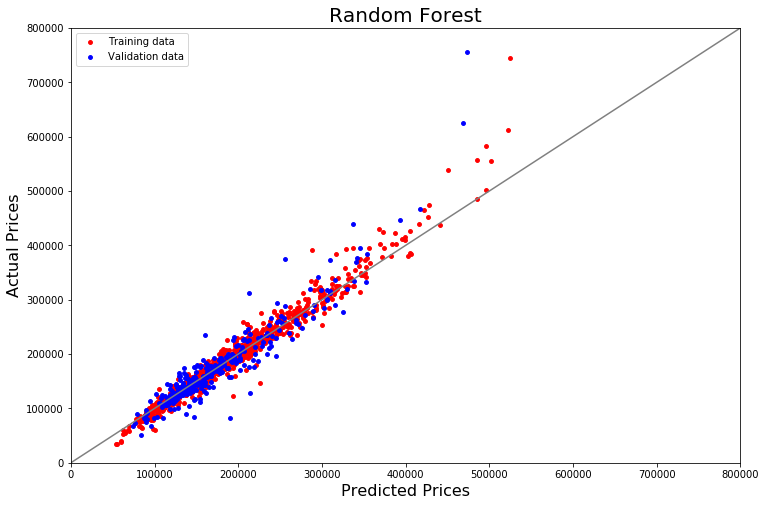

In [307]:
y_train_rForest = random_rforest.predict(X_train)
y_test_rForest = random_rforest.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_rForest), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_rForest), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Random Forest", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## Gradient Boosting

In [308]:
gbm = GradientBoostingRegressor()

gbm.set_params(random_state=42)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [309]:
# Train model on training data
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [310]:
print("The train set R^2 is: %.5f" % gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % gbm.score(X_test, y_test))

The train set R^2 is: 0.96111
The test set R^2 is is: 0.89948


In [311]:
# Initial prediction
gbm_pred = gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(gbm_pred) - np.expm1(y_test.SalePrice))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14903.02
Mean Squared Error (MSE): 0.015213436335775049
Root Mean Square Error (RMSE): 0.12334275955959088
Mean Absolute Percent Error (MAPE): 8.64 %.


# Random Search GBM

In [312]:
gbm_param_grid={'n_estimators':[300, 400, 500, 600],
                'learning_rate':[0.05, 0.1, 1.5],
                'max_depth':[1, 2, 3],
                'min_samples_leaf':[1, 2, 3, 4]}

In [313]:
combos = 1
for key in gbm_param_grid:
    combos *= len(gbm_param_grid[key])  
combos

144

In [352]:
random_search_gbm = RandomizedSearchCV(gbm, gbm_param_grid, n_iter=10, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time  random_search_gbm.fit(X_train, y_train)

CPU times: user 2.03 s, sys: 29.5 ms, total: 2.06 s
Wall time: 16.6 s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [353]:
# get the best parameters
random_search_gbm.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'learning_rate': 0.1}

In [354]:
random_gbm = random_search_gbm.best_estimator_

In [355]:
# Train Data
random_gbm_pred = random_gbm.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(gbm_pred) - np.expm1(y_train).SalePrice))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

SyntaxError: invalid syntax (<ipython-input-355-c738aa72f72a>, line 5)

In [356]:
# Test Data
random_gbm_pred = random_gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_gbm_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_gbm_pred))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

SyntaxError: invalid syntax (<ipython-input-356-29dd006753da>, line 13)

In [357]:
gbm_param_grid1={'n_estimators':[1000, 2000, 3000],
                'learning_rate':[0.01, 0.05, 0.1],
                'max_depth':[2, 3, 4],
                'min_samples_leaf':[5, 10, 15],
                'min_samples_split': [5, 10],
                'loss':['huber']}

In [358]:
combos = 1
for key in gbm_param_grid:
    combos *= len(gbm_param_grid[key])  
combos

144

In [362]:
random_search_gbm1 = RandomizedSearchCV(gbm, gbm_param_grid1, n_iter=10, scoring='neg_mean_squared_error', 
                                      n_jobs=-1, return_train_score = True)

%time  random_search_gbm1.fit(X_train, y_train)

CPU times: user 9.23 s, sys: 171 ms, total: 9.4 s
Wall time: 3min 2s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [364]:
# get the best parameters
random_search_gbm1.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.1}

In [366]:
random_gbm1 = random_search_gbm1.best_estimator_

In [368]:
# Train data
random_gbm_pred1 = random_gbm1.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_gbm_pred1) - np.expm1(y_train).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_gbm_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_gbm_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 2684.8
Mean Squared Error (MSE): 0.0016292557400896489
Root Mean Square Error (RMSE): 0.04036404018541317
Mean Absolute Percent Error (MAPE): 1.68 %.


In [370]:
# Test Data
random_gbm_pred1 = random_gbm1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_gbm_pred1) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_gbm_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_gbm_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14385.9
Mean Squared Error (MSE): 0.013562162528430295
Root Mean Square Error (RMSE): 0.11645669808315147
Mean Absolute Percent Error (MAPE): 8.2 %.


In [371]:
print("The train set R^2 is: %.5f" % random_gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_gbm.score(X_test, y_test))

The train set R^2 is: 0.97320
The test set R^2 is is: 0.91273


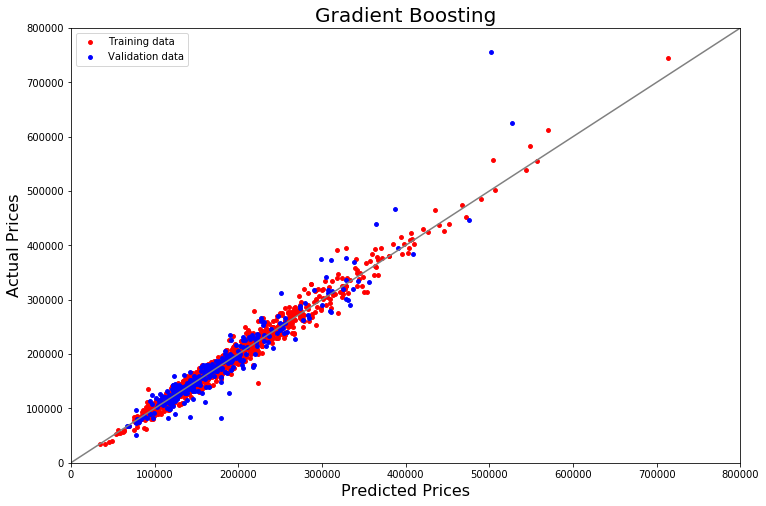

In [372]:
y_train_gradientboost = random_gbm.predict(X_train)
y_test_gradientboost = random_gbm.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_gradientboost), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_gradientboost), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("Gradient Boosting", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

## XGBoost

In [376]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb.set_params(random_state=22)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [377]:
xgb.fit(X_train, y_train)

[19:59:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [378]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))

The train set R^2 is: 0.95397
The test set R^2 is is: 0.89297


In [380]:
# Initial prediction
xgb_pred = xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(xgb_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15740.83
Mean Squared Error (MSE): 0.016198972724643487
Root Mean Square Error (RMSE): 0.12727518503087507
Mean Absolute Percent Error (MAPE): 9.01 %.


# Random Search XGBoost

In [ ]:
xgb_param_grid ={'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth': [2, 3, 4, 5, 6],
                 'min_child_weight': [4, 5, 6],
                 'n_estimators': [400, 450, 500, 550, 600]}

random_search_xgb = RandomizedSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time random_search_xgb.fit(X_train, y_train)

In [ ]:
# get the best parameters
random_search_xgb.best_params_

In [ ]:
random_xgb = random_search_xgb.best_estimator_

In [ ]:
print("The train set R^2 is: %.5f" % random_xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_xgb.score(X_test, y_test))

In [ ]:
#Prediction with tuned hyperparameters
random_xgb_pred = random_xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
xgb_param_grid1 ={'learning_rate': [0.01],
                 'max_depth': [3],
                 'min_child_weight': [0],
                 'n_estimators': [3460],
                 'subsample': [0.7],
                 'colsample_bytree' : [0.7],
                 'objective':['reg:linear'],
                 'nthread':[-1],
                 'scale_pos_weight':[1],
                 'seed':[27],
                 'reg_alpha': [0.00006]}
                 

random_search_xgb1 = RandomizedSearchCV(xgb, xgb_param_grid1, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time random_search_xgb1.fit(X_train, y_train)

In [ ]:
random_search_xgb1.best_params_

In [ ]:
random_xgb1 = random_search_xgb1.best_estimator_

In [ ]:
print("The train set R^2 is: %.5f" % random_xgb1.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_xgb1.score(X_test, y_test))

In [ ]:
# Train Data
random_xgb_pred1 = random_xgb1.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred) - np.expm1(y_train))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
# Test Data
random_xgb_pred1 = random_xgb1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
y_train_xgboost = random_xgb.predict(X_train)
y_test_xgboost = random_xgb.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("XGBoost", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [ ]:
# Blend